<a href="https://colab.research.google.com/github/Santikadwikhansa/REVISI_SANTIKA-DWI-KHANSA_3333210003_KELAS-C/blob/main/REVISI_SANTIKA_DWI_KHANSA_3333210003_KELAS_C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Data Preprocessing

## Overview

Practice for Data Analytic Class in Merdeka Belajar 

## Objecive

• Retrieving data 

• Cleansing, integrating
dan transforming data

• Data Preparation

• Exploratory Data
Analysis

• Data Visualization


**About Dataset**

This is a snapshot of a dataset created by Tony Pin on Melbourne real estate data. It was scraped from publicly available results posted every week from Domain.com.au. The dataset includes Address, Type of Real estate, Suburb, Method of Selling, Rooms, Price, Real Estate Agent, Date of Sale and distance from C.B.D.

This is intended as a static (unchanging) snapshot of https://www.kaggle.com/anthonypino/melbourne-housing-market. It was created in September 2017. Additionally, homes with no Price have been removed.

Dataset description & download https://www.kaggle.com/datasets/dansbecker/melbourne-housing-snapshot

**1.1 Importing Library**

  Untuk Menginport Library dapat menggunakan syntax berikut

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

Berikut adalah penjelasan dari setiap baris kode:

import pandas as pd: Mengimpor modul pandas dengan alias pd. Pandas digunakan untuk manipulasi dan analisis data tabular, seperti membaca file CSV, mengakses kolom dan baris data, dan melakukan transformasi data.

import numpy as np: Mengimpor modul numpy dengan alias np. Numpy adalah library yang menyediakan fungsi-fungsi matematika dan operasi array efisien. Ini sering digunakan untuk manipulasi dan komputasi numerik.

import matplotlib.pyplot as plt: Mengimpor modul pyplot dari library matplotlib dengan alias plt. Matplotlib adalah library yang digunakan untuk visualisasi data, termasuk pembuatan grafik, plot, dan visualisasi lainnya.

from sklearn.preprocessing import LabelEncoder: Mengimpor kelas LabelEncoder dari modul preprocessing dalam library scikit-learn (sklearn). LabelEncoder digunakan untuk mengkodekan label kategori menjadi nilai numerik.

from sklearn.model_selection import train_test_split: Mengimpor fungsi train_test_split dari modul model_selection dalam library scikit-learn (sklearn). Fungsi ini digunakan untuk membagi data menjadi set pelatihan dan pengujian secara acak.

from sklearn.model_selection import cross_val_score: Mengimpor fungsi cross_val_score dari modul model_selection dalam library scikit-learn (sklearn). Fungsi ini digunakan untuk melakukan validasi silang pada model, yang memungkinkan evaluasi kinerja model dengan membagi data menjadi beberapa lipatan dan menghitung skor evaluasi pada setiap lipatan.

from sklearn.model_selection import KFold: Mengimpor kelas KFold dari modul model_selection dalam library scikit-learn (sklearn). KFold adalah metode validasi silang yang membagi data menjadi k fold dan digunakan untuk melatih dan menguji model dengan kumpulan data yang berbeda secara bergantian.

from sklearn.metrics import accuracy_score: Mengimpor fungsi accuracy_score dari modul metrics dalam library scikit-learn (sklearn). Fungsi ini digunakan untuk menghitung skor akurasi, yang merupakan metrik evaluasi yang umum digunakan untuk model klasifikasi.

**1.2 Importing Dataset**

Untuk Menginport dataset dari google drive dapat digunakan syntax berikut

In [2]:
!gdown 1Sb9xw2g2ny22KHqzilFJFjEGVW_TZMX3

Downloading...
From: https://drive.google.com/uc?id=1Sb9xw2g2ny22KHqzilFJFjEGVW_TZMX3
To: /content/laptops.csv
100% 277k/277k [00:00<00:00, 74.0MB/s]


In [3]:
import pandas as pd
dataset = pd.read_csv('/content/laptops.csv')
dataset

,Unnamed: 0,img_link,name,price(in Rs.),processor,ram,os,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.5,14.0,1.0
1,1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.4,53.0,3.0
2,2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,15.6,4.4,4733.0,463.0
3,3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,512 GB SSD,15.6,4.3,10406.0,1040.0
4,4,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,DOS Operating System,256 GB SSD,14.0,3.8,18.0,3.0
...,...,...,...,...,...,...,...,...,...,...,...,...
979,979,https://rukminim1.flixcart.com/image/312/312/k...,ASUS VivoBook 15 Core i3 10th Gen,37990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,64 bit Windows 10 Operating System,1 TB HDD,15.6,4.0,1907.0,227.0
980,980,https://rukminim1.flixcart.com/image/312/312/k...,HP Chromebook MediaTek Kompanio 500,22670,MediaTek MediaTek Kompanio 500 Processor,4 GB LPDDR4X RAM,Chrome Operating System,1 TB HDD,11.6,3.8,5991.0,687.0
981,981,https://rukminim1.flixcart.com/image/312/312/x...,ASUS Ryzen 5 Hexa Core,54990,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,Windows 11 Operating System,512 GB SSD,14.0,4.5,22.0,5.0
982,982,https://rukminim1.flixcart.com/image/312/312/k...,DELL Inspiron Core i3 11th Gen,40990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,64 bit Windows 11 Operating System,1 TB HDD|256 GB SSD,15.6,4.0,801.0,104.0


## 2. Exploratory Data

Untuk membuat tuple yang berisi jumlah baris dan kolom dalam dataset tersebut. Digunakan syntax berikut.

In [4]:
dataset.shape

(984, 12)

Berdasarkan hasil diatas dapat diketahui dalam dataset ini terdapat 984 kolom dan 12 baris data

Untuk mendapatkan daftar kolom dalam dataset tersebut. Digunakan syntax berikut.

In [5]:
dataset.columns

Index(['Unnamed: 0', 'img_link', 'name', 'price(in Rs.)', 'processor', 'ram',
       'os', 'storage', 'display(in inch)', 'rating', 'no_of_ratings',
       'no_of_reviews'],
      dtype='object')

Jadi, indeks atau kolom-kolom yang ditampilkan dalam hasil tersebut adalah bagian dari DataFrame. Setiap kolom memiliki label atau nama yang terdiri dari 'Unnamed: 0', 'img_link', 'name', 'price(in Rs.)', 'processor', 'ram', 'os', 'storage', 'display(in inch)', 'rating', 'no_of_ratings', dan 'no_of_reviews'.
Setiap kolom berisi informasi yang terkait dengan suatu data, seperti gambar produk ('img_link'), nama produk ('name'), harga dalam rupee ('price(in Rs.)'), informasi prosesor ('processor'), kapasitas RAM ('ram'), sistem operasi ('os'), kapasitas penyimpanan ('storage'), ukuran layar dalam inci ('display(in inch)'), rating produk ('rating'), jumlah penilaian ('no_of_ratings'), dan jumlah ulasan ('no_of_reviews').

Codingan dibawah ini digunakan untuk mengembalikan Seri yang berisi tipe data dari setiap kolom dalam dataset tersebut.

In [6]:
dataset.dtypes

Unnamed: 0            int64
img_link             object
name                 object
price(in Rs.)         int64
processor            object
ram                  object
os                   object
storage              object
display(in inch)    float64
rating              float64
no_of_ratings       float64
no_of_reviews       float64
dtype: object

Setiap baris menunjukkan nama kolom di sebelah kiri, dan tipe data yang sesuai dengan kolom tersebut di sebelah kanan. Tipe data yang ditampilkan termasuk:

'Unnamed: 0' memiliki tipe data int64, yang menunjukkan bahwa kolom ini berisi nilai bilangan bulat.
'img_link', 'name', 'processor', 'ram', 'os', dan 'storage' semuanya memiliki tipe data object, yang umumnya digunakan untuk mewakili data teks atau string.
'price(in Rs.)' memiliki tipe data int64, menunjukkan bahwa kolom ini berisi nilai harga dalam format bilangan bulat.
'display(in inch)', 'rating', 'no_of_ratings', dan 'no_of_reviews' semuanya memiliki tipe data float64, yang digunakan untuk mewakili data numerik dengan desimal.

codingan dibawah ini digunakan untuk mencetak informasi rinci tentang dataset, termasuk nama kolom, tipe data kolom, jumlah nilai non-null, dan penggunaan memori.

In [7]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 984 entries, 0 to 983
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        984 non-null    int64  
 1   img_link          984 non-null    object 
 2   name              984 non-null    object 
 3   price(in Rs.)     984 non-null    int64  
 4   processor         984 non-null    object 
 5   ram               984 non-null    object 
 6   os                984 non-null    object 
 7   storage           984 non-null    object 
 8   display(in inch)  984 non-null    float64
 9   rating            688 non-null    float64
 10  no_of_ratings     688 non-null    float64
 11  no_of_reviews     688 non-null    float64
dtypes: float64(4), int64(2), object(6)
memory usage: 92.4+ KB


Berikut adalah makna dari hasil tersebut:

"<class 'pandas.core.frame.DataFrame'>": Menunjukkan bahwa objek yang ditampilkan adalah DataFrame, yaitu struktur data tabular yang disediakan oleh library pandas di Python.

"RangeIndex: 984 entries, 0 to 983": Menunjukkan bahwa DataFrame memiliki total 984 baris, dengan indeks yang mulai dari 0 hingga 983.

"Data columns (total 12 columns)": Menunjukkan bahwa DataFrame tersebut memiliki 12 kolom.

"# Column Non-Null Count Dtype": Menyediakan informasi tentang setiap kolom dalam DataFrame, termasuk nomor urut kolom, nama kolom, jumlah nilai non-null (non-missing) dalam kolom tersebut, dan tipe data (Dtype) dari kolom tersebut.

"dtypes: float64(4), int64(2), object(6)": Menunjukkan tipe data dari masing-masing kolom dalam DataFrame. Ada empat kolom dengan tipe data float64, dua kolom dengan tipe data int64, dan enam kolom dengan tipe data object.

"memory usage: 92.4+ KB": Menunjukkan estimasi penggunaan memori oleh DataFrame dalam kilobyte.

Informasi ini memberikan gambaran tentang struktur dan komposisi DataFrame, termasuk jumlah baris dan kolom, nama kolom, tipe data, dan jumlah nilai non-null dalam setiap kolom. 

Untuk mendapatkan jumlah nilai unik dalam setiap kolom dataset.

In [8]:
dataset.nunique()

Unnamed: 0          984
img_link            584
name                506
price(in Rs.)       449
processor            59
ram                  22
os                   11
storage              16
display(in inch)     21
rating               20
no_of_ratings       273
no_of_reviews       147
dtype: int64

Berikut adalah makna dari hasil tersebut:

'Unnamed: 0': Terdapat 984 nilai non-null dalam kolom 'Unnamed: 0'.

'img_link': Terdapat 584 nilai non-null dalam kolom 'img_link'.

'name': Terdapat 506 nilai non-null dalam kolom 'name'.

'price(in Rs.)': Terdapat 449 nilai non-null dalam kolom 'price(in Rs.)'.

'processor': Terdapat 59 nilai non-null dalam kolom 'processor'.

'ram': Terdapat 22 nilai non-null dalam kolom 'ram'.

'os': Terdapat 11 nilai non-null dalam kolom 'os'.

'storage': Terdapat 16 nilai non-null dalam kolom 'storage'.

'display(in inch)': Terdapat 21 nilai non-null dalam kolom 'display(in inch)'.

'rating': Terdapat 20 nilai non-null dalam kolom 'rating'.

'no_of_ratings': Terdapat 273 nilai non-null dalam kolom 'no_of_ratings'.

'no_of_reviews': Terdapat 147 nilai non-null dalam kolom 'no_of_reviews'.

Jumlah nilai non-null menunjukkan berapa banyak nilai yang ada dalam setiap kolom yang tidak bernilai null atau missing. Informasi ini dapat memberikan gambaran tentang kelengkapan data dalam masing-masing kolom. Kolom dengan jumlah nilai non-null yang lebih rendah dari total baris DataFrame mungkin mengindikasikan keberadaan nilai yang hilang atau kosong (missing values) dalam dataset tersebut.

**2.1 Handling Missing Value**

Let's assume unknown value as missing value since unknown means not known or no values

Untuk mendapatkan jumlah nilai yang hilang (null) dalam setiap kolom dataset.

In [9]:
dataset.isnull().sum()

Unnamed: 0            0
img_link              0
name                  0
price(in Rs.)         0
processor             0
ram                   0
os                    0
storage               0
display(in inch)      0
rating              296
no_of_ratings       296
no_of_reviews       296
dtype: int64

Berdasarkan hasil diatas diketahui bahwa img_link, name, price(in Rs.), processor, ram, os, storage, dan display(in inch) tidak memiliki missing value, sedangkan kolom rating, no_of_ratings, dan no_of_reviews memiliki missing value masing-masing sebanyak 296.

Untuk mendapatkan tipe data dari kolom 'rating' dalam dataset.

In [10]:
dataset['rating'].dtypes

dtype('float64')

Untuk mendapatkan tipe data dari kolom 'no_of_ratings' dalam dataset.

In [11]:
dataset['no_of_ratings'].dtypes

dtype('float64')

Untuk mendapatkan tipe data dari kolom 'no_of_reviews' dalam dataset.

In [12]:
dataset['no_of_reviews'].dtypes

dtype('float64')

Berdasarkan hasil diatas dapat diketahui bahwa kolom rating, no_of_ratings, dan no_of_reviews sama-sama bertipe data float64

Perform imputer to handle missing value in numerical data

Kodingan ini mengimport kelas SimpleImputer dari library sklearn.impute yang digunakan untuk mengisi nilai yang hilang (missing values) dalam dataset dengan strategi tertentu. Berikut adalah penjelasan dari setiap baris kodingan:

Baris pertama mengimport kelas SimpleImputer dari library sklearn.impute. Kelas SimpleImputer digunakan untuk melakukan imputasi (pengisian) nilai yang hilang dalam dataset.

Baris kedua membuat objek imputer yang merupakan instance dari kelas SimpleImputer. Pada baris ini, kita mengatur parameter missing_values menjadi np.nan, yang menunjukkan bahwa kita ingin mengisi nilai yang hilang yang direpresentasikan sebagai np.nan (misalnya, nilai yang hilang dalam bentuk NaN dalam dataset). Parameter strategy diatur menjadi 'mean', yang berarti kita akan mengisi nilai yang hilang dengan nilai rata-rata dari kolom terkait.

Dengan menggunakan kodingan tersebut, kita membuat objek imputer yang siap digunakan untuk melakukan imputasi nilai yang hilang dalam dataset menggunakan strategi pengisian rata-rata.

In [13]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values= np.nan, strategy='mean')
imputer

SimpleImputer()

Kodingan ini mengfitkan (melatih) objek imputer yang telah dibuat sebelumnya pada kolom-kolom 'rating', 'no_of_ratings', dan 'no_of_reviews' dalam dataset (dataset[['rating', 'no_of_ratings', 'no_of_reviews']]). Berikut adalah penjelasan dari setiap baris kodingan:

Baris pertama menggunakan metode fit() pada objek imputer untuk melatih objek tersebut dengan data yang ada. Data yang digunakan adalah kolom-kolom 'rating', 'no_of_ratings', dan 'no_of_reviews' dalam dataset.

Dalam kasus ini, objek imputer akan menghitung nilai rata-rata dari setiap kolom yang digunakan sebagai referensi untuk mengisi nilai yang hilang di dalam kolom tersebut. Metode fit() hanya melakukan komputasi pada data yang diberikan dan mengubah state internal dari objek imputer sesuai dengan data tersebut.

Dengan menggunakan kodingan tersebut, objek imputer akan dilatih dengan data pada kolom-kolom yang ditentukan. Setelah melatih, objek imputer akan siap digunakan untuk melakukan imputasi pada nilai yang hilang dalam kolom-kolom tersebut dengan menggunakan strategi pengisian rata-rata.

In [14]:
imputer = imputer.fit(dataset[['rating', 'no_of_ratings', 'no_of_reviews']])
imputer

SimpleImputer()

Kodingan ini digunakan untuk melakukan transformasi pada dataset dengan menggunakan objek imputer yang telah dilatih sebelumnya. Baris kodingan tersebut juga mencetak jumlah nilai yang hilang (missing values) dalam dataset setelah dilakukan transformasi. Berikut adalah penjelasan dari setiap baris kodingan:

Baris pertama menggunakan metode transform() pada objek imputer untuk melakukan transformasi pada kolom-kolom 'rating', 'no_of_ratings', dan 'no_of_reviews' dalam dataset (dataset[['rating', 'no_of_ratings', 'no_of_reviews']]).

Dalam kasus ini, objek imputer akan mengisi nilai yang hilang dalam kolom-kolom tersebut dengan nilai rata-rata yang telah dihitung pada saat objek tersebut dilatih.

Setelah transformasi selesai, baris kedua menggunakan metode isnull().sum() pada dataset untuk menghitung jumlah nilai yang hilang dalam setiap kolom. Metode ini menghasilkan jumlah nilai yang hilang untuk setiap kolom dalam bentuk DataFrame.

Dengan menggunakan kodingan tersebut, dataset akan mengalami transformasi di mana nilai yang hilang dalam kolom-kolom 'rating', 'no_of_ratings', dan 'no_of_reviews' akan diisi dengan nilai rata-rata. Selanjutnya, jumlah nilai yang hilang dalam dataset akan dicetak untuk setiap kolom, sehingga kita dapat melihat apakah transformasi telah berhasil mengisi semua nilai yang hilang atau tidak.

In [15]:
dataset[['rating', 'no_of_ratings', 'no_of_reviews']] = imputer.transform(dataset[['rating', 'no_of_ratings', 'no_of_reviews']])
dataset.isnull().sum()

Unnamed: 0          0
img_link            0
name                0
price(in Rs.)       0
processor           0
ram                 0
os                  0
storage             0
display(in inch)    0
rating              0
no_of_ratings       0
no_of_reviews       0
dtype: int64

Using drop column tohandle missing value on categorical or object data

In [16]:
dataset = dataset.dropna(axis=1)
dataset.isnull().sum()

Unnamed: 0          0
img_link            0
name                0
price(in Rs.)       0
processor           0
ram                 0
os                  0
storage             0
display(in inch)    0
rating              0
no_of_ratings       0
no_of_reviews       0
dtype: int64

drop datetime column since we don't need it, we will use it in the next lecure for forecasting time series data

Codingan dibawah ini digunakan untuk menghapus kolom 'os' dari DataFrame dataset dan menyimpan hasilnya kembali ke variabel dataset.

In [17]:
dataset = dataset.drop('os', axis=1)
dataset

,Unnamed: 0,img_link,name,price(in Rs.),processor,ram,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,512 GB SSD,15.6,4.500000,14.00000,1.000000
1,1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,1 TB HDD|256 GB SSD,15.6,4.400000,53.00000,3.000000
2,2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,15.6,4.400000,4733.00000,463.000000
3,3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,15.6,4.300000,10406.00000,1040.000000
4,4,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Athlon Dual Core,18990,AMD Athlon Dual Core Processor,4 GB DDR4 RAM,256 GB SSD,14.0,3.800000,18.00000,3.000000
...,...,...,...,...,...,...,...,...,...,...,...
979,979,https://rukminim1.flixcart.com/image/312/312/k...,ASUS VivoBook 15 Core i3 10th Gen,37990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,1 TB HDD,15.6,4.000000,1907.00000,227.000000
980,980,https://rukminim1.flixcart.com/image/312/312/k...,HP Chromebook MediaTek Kompanio 500,22670,MediaTek MediaTek Kompanio 500 Processor,4 GB LPDDR4X RAM,1 TB HDD,11.6,3.800000,5991.00000,687.000000
981,981,https://rukminim1.flixcart.com/image/312/312/x...,ASUS Ryzen 5 Hexa Core,54990,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,14.0,4.500000,22.00000,5.000000
982,982,https://rukminim1.flixcart.com/image/312/312/k...,DELL Inspiron Core i3 11th Gen,40990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,1 TB HDD|256 GB SSD,15.6,4.000000,801.00000,104.000000


## 3. Data Visualization

**Eploratory Data Analysis (EDA)**

we will not use exploratory data analysis like in the previous class, we'll take another apporach to visualize data

**3.1 Check Outliers**

Outliers are values at the extreme ends of a dataset.

Some outliers represent true values from natural variation in the population. Other outliers may result from incorrect data entry, equipment malfunctions, or other measurement errors.

An outlier isn’t always a form of dirty or incorrect data, so you have to be careful with them in data cleansing. What you should do with an outlier depends on its most likely cause.

for more info: https://www.scribbr.com/statistics/outliers/

perintah tersebut akan memberikan ringkasan statistik deskriptif untuk DataFrame 'dataset'. Metode 'describe()' secara otomatis menghasilkan informasi seperti jumlah data, rata-rata, standar deviasi, nilai minimum, kuartil, dan nilai maksimum untuk setiap kolom numerik dalam DataFrame.

perintah ini dapat menjalankan perintah 'dataset.describe()' di cell Colab dan hasilnya akan ditampilkan sebagai output di bawahnya. Ini akan membantu Anda memahami distribusi data dalam DataFrame secara keseluruhan, memberikan wawasan tentang nilai-nilai statistik penting, dan membantu Anda dalam analisis data lebih lanjut.

In [18]:
dataset.describe()

,Unnamed: 0,price(in Rs.),display(in inch),rating,no_of_ratings,no_of_reviews
count,984.000000,984.000000,984.000000,984.000000,984.00000,984.000000
mean,491.500000,80960.720528,15.148374,4.284884,718.09157,83.898256
std,284.200633,57421.220919,1.332078,0.276077,1463.66797,176.892962
min,0.000000,15990.000000,11.600000,1.600000,1.00000,0.000000
25%,245.750000,42655.000000,14.000000,4.200000,37.00000,3.000000
50%,491.500000,62990.000000,15.600000,4.284884,385.00000,39.500000
75%,737.250000,94990.000000,15.600000,4.400000,718.09157,83.898256
max,983.000000,419990.000000,35.000000,5.000000,15492.00000,2054.000000


Untuk melihat plot data dari DataFrame dataset. Jenis plot yang dihasilkan akan tergantung pada jenis data dalam DataFrame, seperti plot garis untuk data seri waktu atau plot titik untuk data numerik.

Namun, perlu diingat bahwa efektivitas plot ini tergantung pada jenis dan struktur data dalam dataset. Kita perlu mengatur opsi tambahan, seperti jenis plot atau kolom yang ingin divisualisasikan, untuk mendapatkan tampilan yang paling relevan dan informatif.

<Axes: >

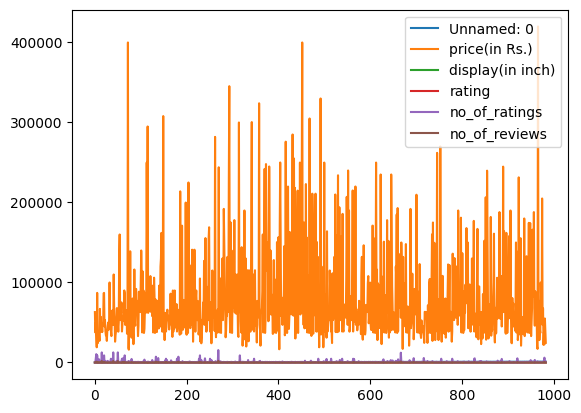

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline
dataset.plot()

Untuk melihat sebuah box plot yang dihasilkan dari data dalam DataFrame dataset. Box plot adalah jenis visualisasi yang digunakan untuk menunjukkan distribusi, nilai-nilai kuartil, dan adanya pencilan pada data. Orientasi horizontal digunakan dalam contoh ini, sehingga setiap kolom pada DataFrame akan mewakili sebuah variabel, dan sumbu y akan menunjukkan nilai-nilai dari variabel tersebut.

Pastikan telah memuat dataset yang relevan ke dalam DataFrame dataset sebelum menjalankan kode ini. Jika dataset belum dimuat, dapat juga menggunakan sns.load_dataset() untuk memuat dataset bawaan seaborn atau memuat dataset lain yang kita miliki ke dalam DataFrame sebelumnya.

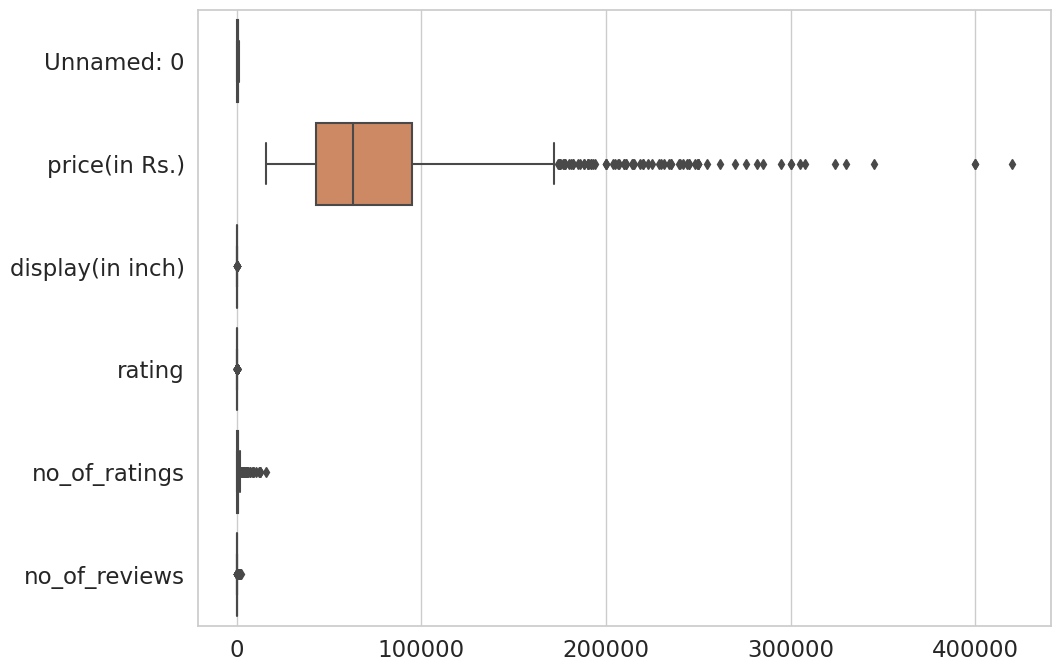

In [20]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

Untuk melihat scatter plot dari data dalam DataFrame 'dataset'. Scatter plot digunakan untuk menampilkan hubungan antara dua variabel numerik. Dalam contoh ini, sumbu x menunjukkan nilai rating, sedangkan sumbu y menunjukkan harga dalam Rupee (Rs.). Setiap titik pada plot akan menunjukkan nilai rating dan harga yang sesuai.

Pastikan DataFrame 'dataset' telah terisi dengan data yang relevan sebelum menjalankan kode ini. Jika belum, pastikan Anda telah memuat dataset yang sesuai ke dalam DataFrame tersebut.

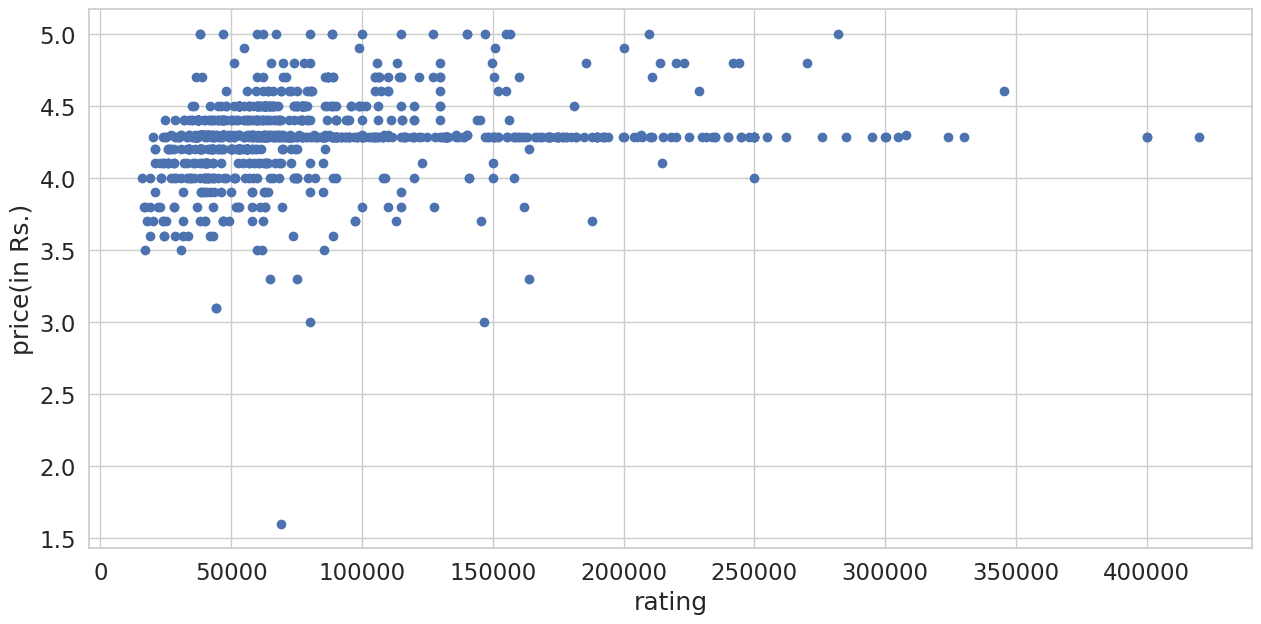

In [21]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['price(in Rs.)'], dataset['rating'])
 
# x-axis label
ax.set_xlabel('rating')
 
# y-axis label
ax.set_ylabel('price(in Rs.)')
plt.show()

**Removing the outliers using IQR**

**IQR (Inter Quartile Range)**

IQR = Quartile3 – Quartile1

Quartile description: https://rumusbilangan.com/rumus-kuartil/


IQR is interpolation method to remove outliers

To define the outlier base value is defined above and below datasets normal range namely Upper and Lower bounds, define the upper and the lower bound (1.5*IQR value is considered) :

upper = Q3 +1.5*IQR

lower = Q1 – 1.5*IQR

how to calculate IQR:

https://www.timesmojo.com/what-is-the-15-iqr-rule/

https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In the above formula as according to statistics, the 0.5 scale-up of IQR (new_IQR = IQR + 0.5*IQR) is taken, to consider all the data between 2.7 standard deviations in the Gaussian Distribution.

Untuk melihat cetakan hasil perhitungan IQR dan bentuk awal DataFrame 'dataset'. IQR adalah ukuran statistik yang menggambarkan rentang antara kuartil pertama (Q1) dan kuartil ketiga (Q3). Nilai IQR dapat memberikan informasi tentang sebaran data dan kehadiran outlier.

Pastikan DataFrame 'dataset' telah terisi dengan data yang relevan sebelum menjalankan kode ini. Jika belum, pastikan Anda telah memuat dataset yang sesuai ke dalam DataFrame tersebut.

In [22]:
import sklearn

# IQR Price
Q1 = np.percentile(dataset['price(in Rs.)'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['price(in Rs.)'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (984, 11)


Old Shape: Menunjukkan bentuk atau dimensi data sebelum dilakukan kolaborasi atau penggabungan. Dalam hal ini, bentuk data adalah (984, 11), yang berarti data tersebut terdiri dari 984 baris dan 11 kolom sebelum proses kolaborasi dilakukan.

Kode ini digunakan untuk menghapus outlier dari dataset. Berikut adalah penjelasan dari setiap baris kode:

Baris pertama mendefinisikan batas atas (upper bound) untuk mengidentifikasi outlier. Ini dihitung dengan menambahkan 1,5 kali rentang interkuartil (IQR) ke kuartil ketiga (Q3).

Baris kedua mendefinisikan batas bawah (lower bound) untuk mengidentifikasi outlier. Ini dihitung dengan mengurangi 1,5 kali rentang interkuartil (IQR) dari kuartil pertama (Q1).

Baris ketiga mencari indeks dari outlier di atas batas atas (upper bound) dengan memfilter dataset berdasarkan nilai 'price(in Rs.)' yang lebih besar dari upper.

Baris keempat mencari indeks dari outlier di bawah batas bawah (lower bound) dengan memfilter dataset berdasarkan nilai 'price(in Rs.)' yang lebih kecil dari lower.

Baris kelima menggabungkan indeks-outlier dari atas (outliers_upper) dan indeks-outlier dari bawah (outliers_lower) dengan menggunakan fungsi append().
Baris keenam menghapus baris-baris dengan indeks outlier dari dataset menggunakan fungsi drop().

Baris terakhir mencetak bentuk (shape) dataset yang telah diubah setelah menghapus outlier.

Secara keseluruhan, kode ini mengidentifikasi outlier berdasarkan nilai 'price(in Rs.)' dalam dataset, dan kemudian menghapus baris-baris yang mengandung outlier tersebut.

In [23]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['price(in Rs.)'] > upper].index
outliers_lower = dataset[dataset['price(in Rs.)'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (905, 11)


New Shape: Menunjukkan bentuk atau dimensi data setelah dilakukan kolaborasi atau penggabungan. Dalam hal ini, bentuk data adalah (905, 11), yang berarti data tersebut terdiri dari 905 baris dan 11 kolom setelah proses kolaborasi dilakukan.
Perubahan bentuk dari (984, 11) menjadi (905, 11) menunjukkan bahwa beberapa entitas atau baris mungkin telah dihapus atau digabungkan selama proses kolaborasi. Hal ini dapat terjadi karena beberapa alasan, seperti penghapusan data duplikat, penggabungan data dari sumber yang berbeda, atau penambahan data baru ke dalam dataset. 

Kode ini menghitung rentang interkuartil (IQR) dari kolom 'rating' dalam dataset menggunakan library sklearn dan mencetak bentuk (shape) awal dari dataset sebelum pemrosesan.

Berikut adalah penjelasan dari setiap baris kode:

Baris pertama mengimpor library sklearn. Namun, tidak ada modul atau fungsi dari sklearn yang digunakan dalam kode ini, sehingga tidak ada pengaruh langsung terhadap perhitungan IQR.

Baris kedua menghitung kuartil pertama (Q1) dari kolom 'rating' menggunakan fungsi np.percentile() dari library NumPy. Nilai 25 sebagai argumen pertama menunjukkan bahwa Q1 adalah persentil ke-25 dari data. Metode 'midpoint' digunakan untuk menghitung persentil yang merupakan nilai tengah di antara dua titik data.

Baris ketiga menghitung kuartil ketiga (Q3) dari kolom 'rating' menggunakan fungsi np.percentile(). Nilai 75 sebagai argumen pertama menunjukkan bahwa Q3 adalah persentil ke-75 dari data. Metode 'midpoint' juga digunakan untuk menghitung persentil.

Baris keempat menghitung rentang interkuartil (IQR) dengan mengurangi nilai Q1 dari nilai Q3. IQR adalah ukuran statistik yang menggambarkan sebaran data di antara kuartil pertama dan ketiga.

Baris kelima mencetak bentuk (shape) awal dari dataset menggunakan fungsi shape dan mencetak nilai "Old Shape: " diikuti oleh bentuk dataset yang ada sebelum pemrosesan.

Kode ini memberikan informasi tentang Q1, Q3, dan IQR dari kolom 'rating' dalam dataset, serta mencetak bentuk awal dataset sebelum pemrosesan. Namun, tidak ada pemrosesan lebih lanjut atau penggunaan nilai Q1, Q3, atau IQR dalam kode yang diberikan.

In [24]:
import sklearn

# IQR Landsize
Q1 = np.percentile(dataset['rating'], 25,
                   method = 'midpoint')
 
Q3 = np.percentile(dataset['rating'], 75,
                   method = 'midpoint')
IQR = Q3 - Q1
 
print("Old Shape: ", dataset.shape)

Old Shape:  (905, 11)


Kode ini digunakan untuk menghapus outlier dari dataset berdasarkan nilai 'rating'. Berikut adalah penjelasan dari setiap baris kode:

Baris pertama menghitung batas atas (upper bound) untuk mengidentifikasi outlier. Ini dihitung dengan menambahkan 1,5 kali rentang interkuartil (IQR) ke kuartil ketiga (Q3).

Baris kedua menghitung batas bawah (lower bound) untuk mengidentifikasi outlier. Ini dihitung dengan mengurangi 1,5 kali rentang interkuartil (IQR) dari kuartil pertama (Q1).

Baris ketiga mencari indeks-indeks outlier di atas batas atas (upper bound) dengan memfilter dataset berdasarkan nilai 'rating' yang lebih besar dari upper.

Baris keempat mencari indeks-indeks outlier di bawah batas bawah (lower bound) dengan memfilter dataset berdasarkan nilai 'rating' yang lebih kecil dari lower.

Baris kelima menggabungkan indeks-indeks outlier dari atas (outliers_upper) dan indeks-indeks outlier dari bawah (outliers_lower) menggunakan fungsi 'append()'.

Baris keenam menghapus baris-baris dengan indeks-indeks outlier dari dataset menggunakan fungsi 'drop()'.

Baris terakhir mencetak bentuk (shape) baru dari dataset setelah menghapus outlier.

Secara keseluruhan, kode ini mengidentifikasi outlier berdasarkan nilai 'rating' dalam dataset, dan kemudian menghapus baris-baris yang mengandung outlier tersebut.

In [25]:
# Upper bound
upper = Q3 + 1.5 * IQR

# Lower bound
lower = Q1 - 1.5 * IQR

# Finding the indices of the outliers
outliers_upper = dataset[dataset['rating'] > upper].index
outliers_lower = dataset[dataset['rating'] < lower].index

# Concatenate the indices of the outliers
outliers = outliers_upper.append(outliers_lower)

# Removing the outliers
dataset.drop(outliers, inplace=True)

print("New Shape: ", dataset.shape)


New Shape:  (811, 11)


Kode ini digunakan untuk membuat boxplot dari dataset menggunakan library seaborn dalam lingkungan Collab (Google Colaboratory). Berikut adalah penjelasan dari setiap baris kode:

Baris pertama mengimpor library seaborn dengan menggunakan perintah import seaborn as sns. Library ini digunakan untuk membuat visualisasi data yang informatif dan menarik.

Baris kedua %matplotlib inline digunakan untuk menampilkan visualisasi di dalam notebook Collab.

Baris ketiga mengatur konfigurasi visualisasi dengan menggunakan sns.set(). Parameter rc digunakan untuk mengatur ukuran (figsize) dan font_scale plot, sedangkan style digunakan untuk mengatur tampilan grid menjadi 'whitegrid'.

Baris keempat adalah komentar yang menjelaskan bahwa kita akan menggunakan dataset bernama 'tips'. Namun, kode ini seharusnya dihapus atau dikoreksi, karena variabel 'dataset' belum didefinisikan sebelumnya.

Baris kelima menggunakan fungsi sns.boxplot() untuk membuat boxplot dari dataset. Parameter data digunakan untuk menentukan dataset yang akan digunakan dalam boxplot. Parameter orient="h" menentukan orientasi boxplot menjadi horizontal (membuat boxplot pada sumbu x).

Kode ini digunakan untuk memvisualisasikan data dalam bentuk boxplot menggunakan library seaborn dalam lingkungan Collab. Namun, perlu diperhatikan bahwa variabel 'dataset' harus didefinisikan sebelumnya dengan dataset yang valid agar kode ini berfungsi dengan benar.

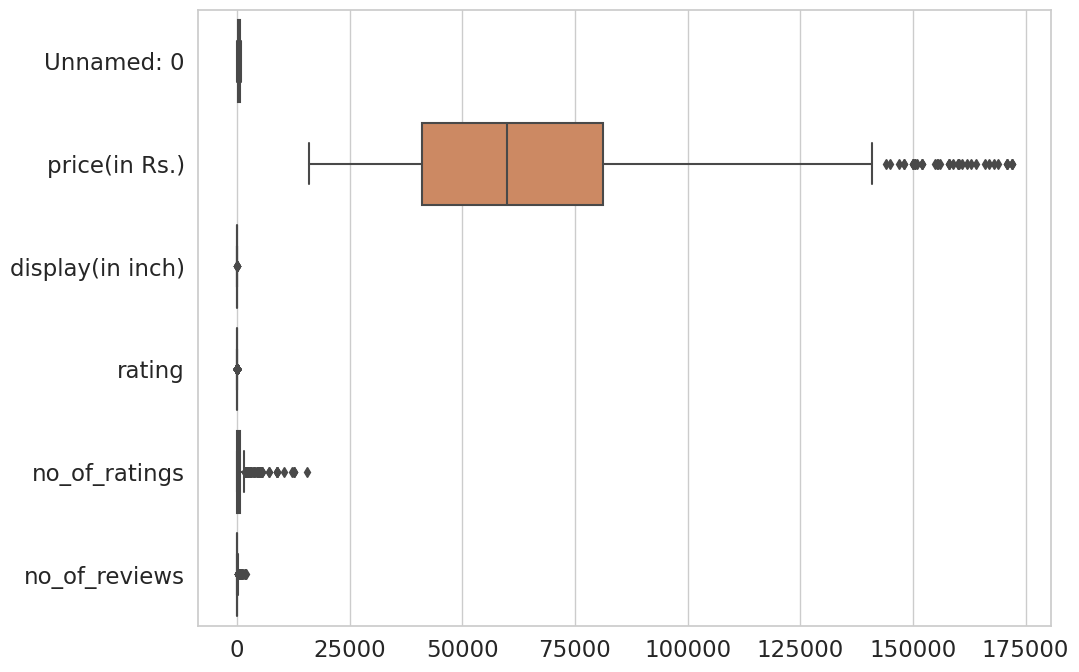

In [26]:
import seaborn as sns
%matplotlib inline

sns.set(rc={'figure.figsize':(11,8)}, font_scale=1.5, style='whitegrid')

# tips = sns.load_dataset(dataset)
sns.boxplot(data=dataset, orient="h");

Kode ini digunakan untuk membuat scatter plot dari dataset menggunakan library matplotlib dalam lingkungan Collab (Google Colaboratory). Berikut adalah penjelasan dari setiap baris kode:

Baris pertama membuat objek subplot dan mengatur ukuran plot menggunakan fig, ax = plt.subplots(figsize = (15,7)). Parameter figsize digunakan untuk menentukan lebar dan tinggi plot dalam satuan inch.

Baris kedua menggunakan fungsi scatter() dari objek ax untuk membuat scatter plot. Data yang akan digunakan diambil dari kolom 'price(in Rs.)' dan 'rating' dalam dataset. Ini akan menghasilkan titik-titik pada plot yang mewakili hubungan antara harga (price) dan rating.

Baris ketiga dan keempat mengatur label sumbu x dan y menggunakan ax.set_xlabel() dan ax.set_ylabel().

Baris kelima menggunakan plt.show() untuk menampilkan scatter plot.

Kode ini menghasilkan scatter plot yang menampilkan hubungan antara 'rating' dan 'price(in Rs.)' dalam dataset. Sumbu x menunjukkan rating dan sumbu y menunjukkan harga dalam Rupee. Scatter plot digunakan untuk melihat sebaran dan korelasi antara dua variabel numerik.

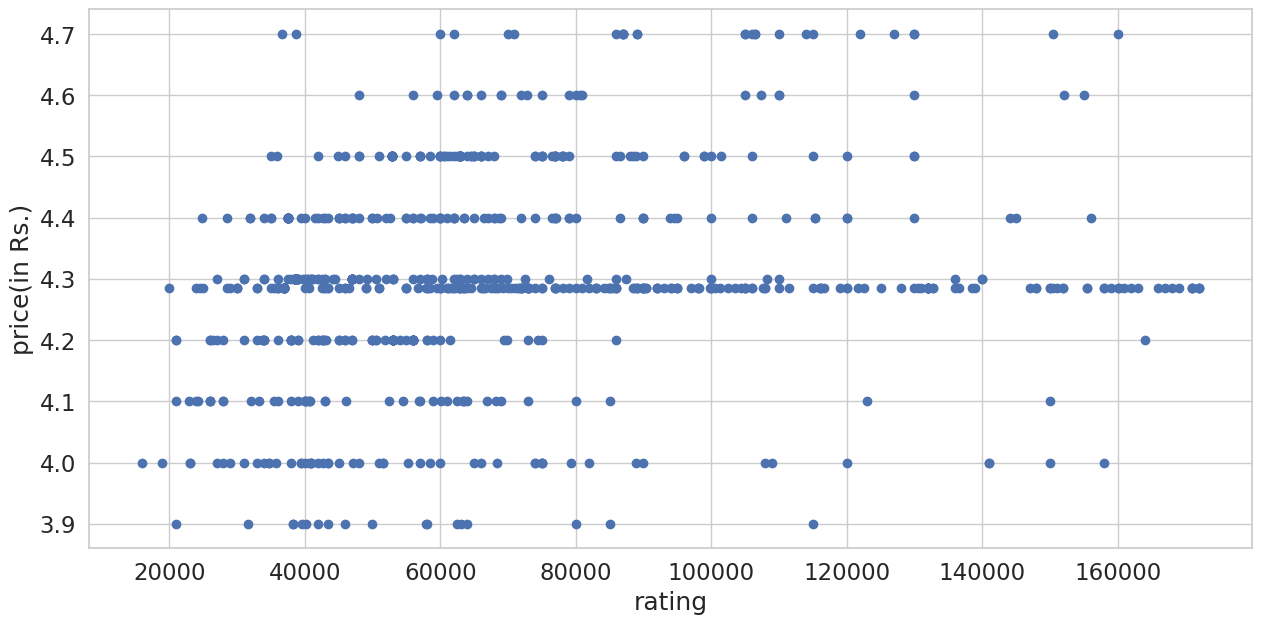

In [27]:
# Scatter plot
fig, ax = plt.subplots(figsize = (15,7))
ax.scatter(dataset['price(in Rs.)'], dataset['rating'])
 
# x-axis label
ax.set_xlabel('rating')
 
# y-axis label
ax.set_ylabel('price(in Rs.)')
plt.show()

Show data distribution based on density (kde - kernel density estimation)

Kode ini digunakan untuk membuat multiple kernel density estimation (KDE) plots dari dataset menggunakan library pandas dan matplotlib dalam lingkungan Collab (Google Colaboratory). Berikut adalah penjelasan dari setiap baris kode:

Baris pertama menggunakan fungsi plot() dari objek dataset untuk membuat KDE plots. Parameter kind='kde' menentukan jenis plot yang akan digunakan, yaitu KDE plot. Parameter subplots=True menunjukkan bahwa multiple plots akan dibuat. Parameter layout=(10,2) mengatur tata letak dari multiple plots menjadi 10 baris dan 2 kolom. Parameter figsize=(15,12) mengatur ukuran keseluruhan plot. Parameter sharex=False menunjukkan bahwa sumbu x tidak akan dibagi oleh semua subplots.

Baris kedua menggunakan plt.show() untuk menampilkan plot yang telah dibuat.

Kode ini menghasilkan multiple KDE plots yang menampilkan estimasi kepadatan kernel dari setiap kolom dalam dataset. Setiap plot menunjukkan distribusi data pada kolom yang bersesuaian. Multiple plots disusun dalam tata letak 10 baris dan 2 kolom, dengan ukuran plot total 15x12 inch. Plot ini membantu untuk memahami sebaran data dalam setiap variabel kolom secara visual.

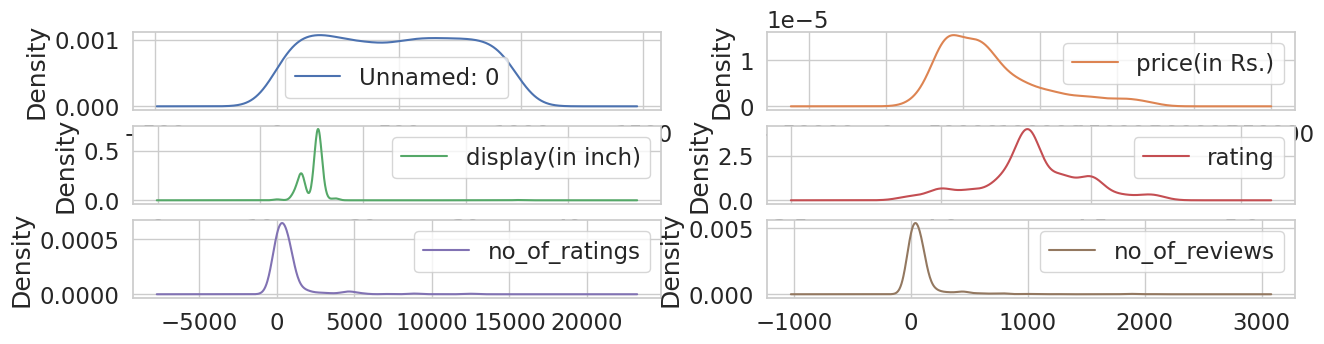

In [28]:
dataset.plot(kind='kde',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Show data distribution based on histogram

Kode ini digunakan untuk membuat multiple histogram plots dari dataset menggunakan library pandas dan matplotlib dalam lingkungan Collab (Google Colaboratory). Berikut adalah penjelasan dari setiap baris kode:

Baris pertama menggunakan fungsi plot() dari objek dataset untuk membuat histogram plots. Parameter kind='hist' menentukan jenis plot yang akan digunakan, yaitu histogram. Parameter subplots=True menunjukkan bahwa multiple plots akan dibuat. Parameter layout=(10,2) mengatur tata letak dari multiple plots menjadi 10 baris dan 2 kolom. Parameter figsize=(15,12) mengatur ukuran keseluruhan plot. Parameter sharex=False menunjukkan bahwa sumbu x tidak akan dibagi oleh semua subplots.

Baris kedua menggunakan plt.show() untuk menampilkan plot yang telah dibuat.

Kode ini menghasilkan multiple histogram plots yang menampilkan distribusi data pada setiap kolom dalam dataset. Setiap plot menunjukkan frekuensi atau jumlah kemunculan nilai-nilai dalam kolom yang bersesuaian. Multiple plots disusun dalam tata letak 10 baris dan 2 kolom, dengan ukuran plot total 15x12 inch. Plot ini membantu untuk memahami distribusi data dalam setiap variabel kolom secara visual.

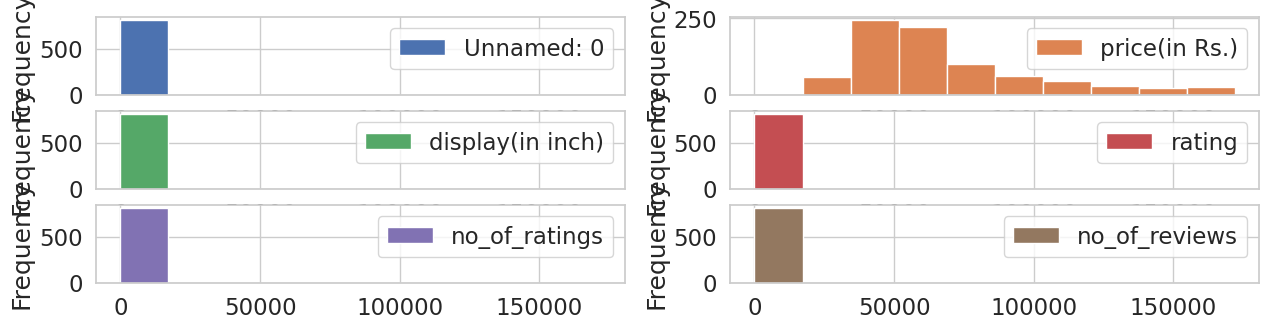

In [29]:
dataset.plot(kind='hist',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

Kode ini digunakan untuk membuat multiple line plots dari dataset menggunakan library pandas dan matplotlib dalam lingkungan Collab (Google Colaboratory). Berikut adalah penjelasan dari setiap baris kode:

Baris pertama menggunakan fungsi plot() dari objek dataset untuk membuat line plots. Parameter kind='line' menentukan jenis plot yang akan digunakan, yaitu line plot. Parameter subplots=True menunjukkan bahwa multiple plots akan dibuat. Parameter layout=(10,2) mengatur tata letak dari multiple plots menjadi 10 baris dan 2 kolom. Parameter figsize=(15,12) mengatur ukuran keseluruhan plot. Parameter sharex=False menunjukkan bahwa sumbu x tidak akan dibagi oleh semua subplots.

Baris kedua menggunakan plt.show() untuk menampilkan plot yang telah dibuat.

Kode ini menghasilkan multiple line plots yang menampilkan tren atau perubahan nilai-nilai dalam setiap kolom dalam dataset seiring dengan perubahan indeks. Setiap plot menunjukkan perubahan nilai-nilai dari waktu ke waktu atau indeks ke indeks. Multiple plots disusun dalam tata letak 10 baris dan 2 kolom, dengan ukuran plot total 15x12 inch. Plot ini membantu untuk memvisualisasikan tren atau pola data dalam setiap variabel kolom secara visual.

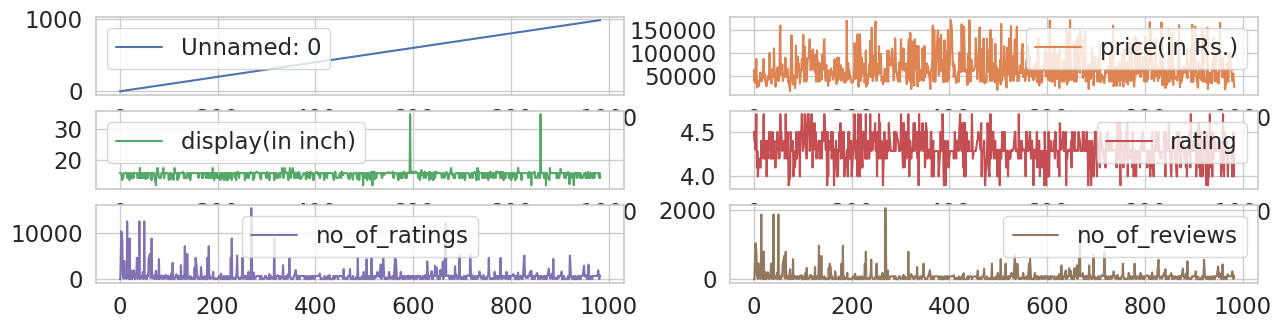

In [30]:
dataset.plot(kind='line',subplots=True,layout=(10,2),figsize=(15,12), sharex=False)
plt.show()

**3.2 CORRELATION MATRIX**

Kode ini digunakan untuk membuat matriks scatter plot dari dataset menggunakan library pandas dan matplotlib dalam lingkungan Collab (Google Colaboratory). Berikut adalah penjelasan dari setiap baris kode:

Baris pertama menggunakan fungsi scatter_matrix() dari modul plotting dalam library pandas untuk membuat matriks scatter plot. Parameter pertama dataset menentukan dataset yang akan digunakan. Matriks scatter plot ini akan menunjukkan hubungan sebaran antara setiap pasangan kolom dalam dataset.

Baris kedua menggunakan plt.show() untuk menampilkan matriks scatter plot yang telah dibuat.

Kode ini menghasilkan matriks scatter plot yang menampilkan hubungan sebaran antara setiap pasangan kolom dalam dataset. Setiap sel pada matriks menunjukkan scatter plot yang menggambarkan hubungan antara dua kolom. Ukuran keseluruhan matriks ditentukan oleh figsize=(12,12) dengan ukuran plot sebesar 12x12 inch. Matriks scatter plot membantu untuk memvisualisasikan korelasi dan pola hubungan antara variabel dalam dataset.

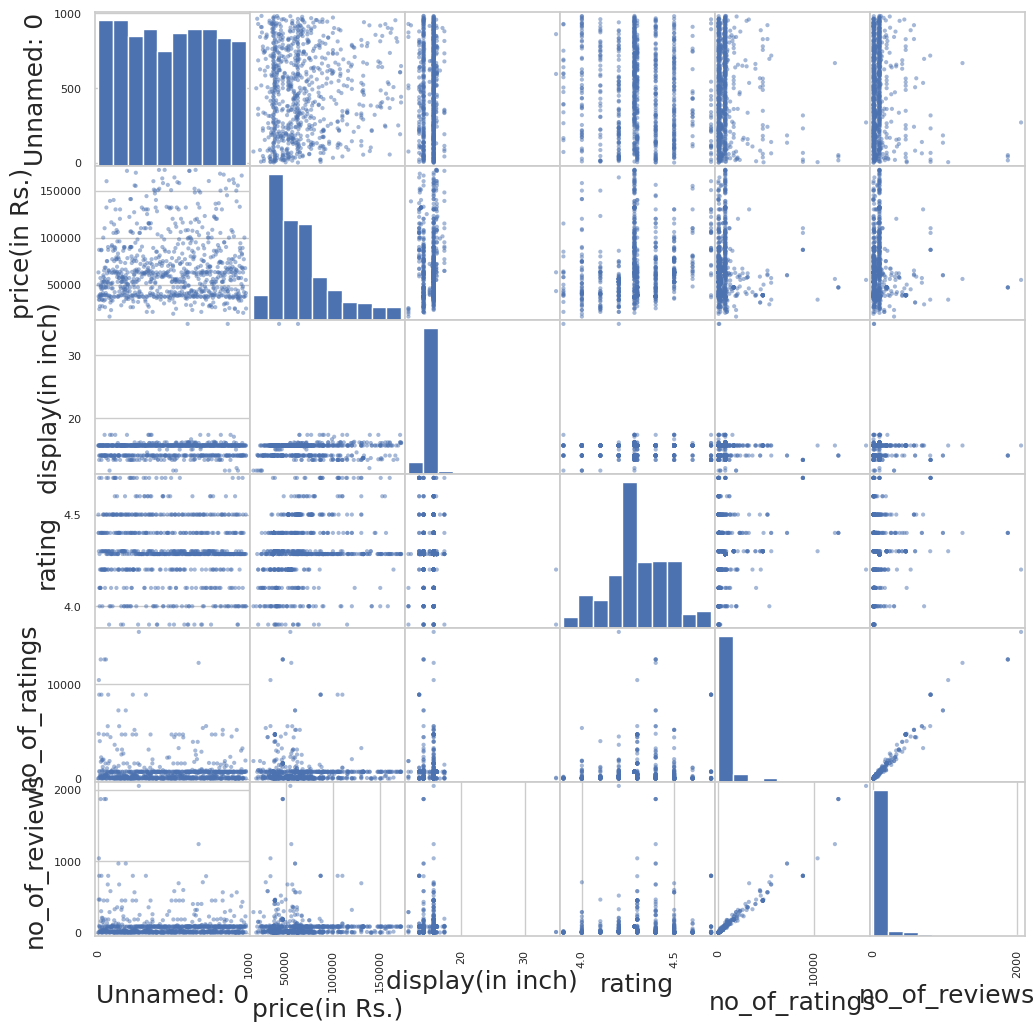

In [31]:
pd.plotting.scatter_matrix(dataset,figsize=(12,12))
plt.show()

correlation matrix with heatmap

Kode ini digunakan untuk membuat heatmap dari matriks korelasi (correlation matrix) dari dataset menggunakan library pandas, seaborn, dan matplotlib dalam lingkungan Collab (Google Colaboratory). Berikut adalah penjelasan dari setiap baris kode:

Baris pertama menginisialisasi variabel corr_data dengan dataset. Variabel ini akan digunakan untuk menghitung matriks korelasi.

Baris kedua menggunakan fungsi corr() pada corr_data untuk menghitung matriks korelasi antar kolom-kolom dalam dataset. Hasilnya disimpan dalam variabel corr.

Baris ketiga menggunakan fungsi heatmap() dari library seaborn untuk membuat heatmap dari matriks korelasi. Parameter corr menentukan data yang akan digunakan. Parameter annot=True menampilkan angka korelasi pada setiap sel heatmap. Parameter cmap='RdYlGn' menentukan skema warna yang akan digunakan. Parameter linewidths=0.2 mengatur ketebalan garis pada heatmap. Parameter annot_kws={'size':10} mengatur ukuran teks pada angka korelasi.

Baris keempat dan kelima digunakan untuk mengatur ukuran keseluruhan plot menggunakan plt.gcf() dan fig.set_size_inches(15,7). Plot ini akan memiliki lebar 15 inch dan tinggi 7 inch.

Baris keenam dan ketujuh mengatur ukuran font pada sumbu x dan y menggunakan plt.xticks() dan plt.yticks(). Parameter fontsize=10 mengatur ukuran font. Parameter rotation=-30 mengatur rotasi teks pada sumbu x.

Baris kedelapan menggunakan plt.title() untuk memberikan judul pada plot dengan teks "Correlation Matrix".

Baris terakhir menggunakan plt.show() untuk menampilkan plot heatmap yang telah dibuat.

Kode ini menghasilkan heatmap dari matriks korelasi antar kolom dalam dataset. Heatmap menunjukkan kekuatan dan arah hubungan korelasi antara setiap pasangan kolom dengan skala warna. Ukuran keseluruhan plot adalah 15x7 inch. Heatmap juga menampilkan angka korelasi pada setiap sel untuk memberikan informasi lebih detail. Plot ini membantu untuk menganalisis hubungan korelasi antara variabel dalam dataset.

<ipython-input-32-4b443a21f68f>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = corr_data.corr()


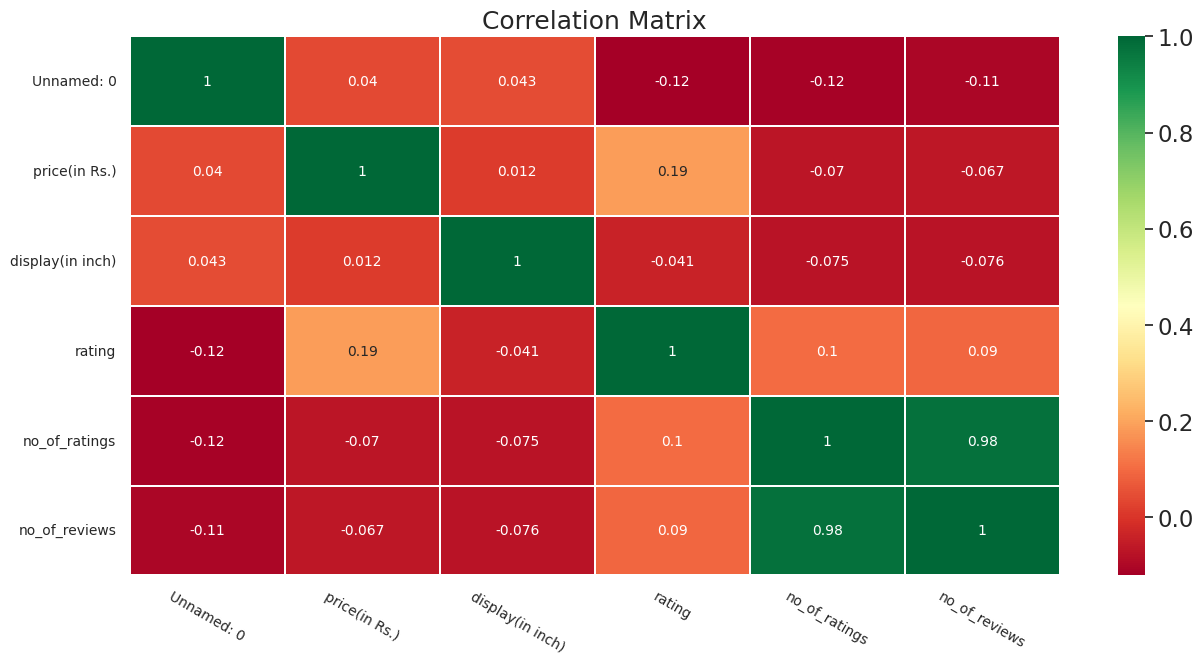

In [32]:
corr_data = dataset
corr = corr_data.corr()

cor_plot = sns.heatmap(corr,annot=True,cmap='RdYlGn',linewidths=0.2,annot_kws={'size':10})
fig=plt.gcf()
fig.set_size_inches(15,7)
plt.xticks(fontsize=10,rotation=-30)
plt.yticks(fontsize=10)
plt.title('Correlation Matrix')
plt.show()

EXPLORATORY DATA ANALYSIS

In [33]:
dataset3 = dataset

Berikut adalah penjelasan untuk setiap baris kode:

'dist_age_balance = plt.figure(figsize=(10,6))': Membuat objek figure dengan ukuran 10x6 (10 inch lebar dan 6 inch tinggi) untuk menampung plot distribusi.

'ra1 = dist_age_balance.add_subplot(1,2,1)': Menambahkan subplot pertama (1 baris, 2 kolom) ke dalam objek figure. 'ra1' akan menjadi variabel yang merujuk pada subplot pertama.

'ra2 = dist_age_balance.add_subplot(1,2,2)': Menambahkan subplot kedua (1 baris, 2 kolom) ke dalam objek figure. 'ra2' akan menjadi variabel yang merujuk pada subplot kedua.

'ra1.hist(dataset3['price(in Rs.)'])': Membuat histogram dari atribut 'price(in Rs.)' dalam dataset3 dan menampilkannya di subplot pertama ('ra1').

'ra1.set_title('The Distribution of price(in Rs.)')': Memberikan judul pada subplot pertama untuk menjelaskan bahwa plot tersebut adalah distribusi dari 'price(in Rs.)'.

'ra2.hist(dataset3['no_of_ratings'], color='skyblue'): Membuat histogram dari atribut 'no_of_ratings' dalam dataset3 dan menampilkannya di subplot kedua ('ra2'). Histogram ini akan diwarnai dengan warna langit biru ('skyblue').

'ra2.set_title('The Distribution of no_of_ratings')': Memberikan judul pada subplot kedua untuk menjelaskan bahwa plot tersebut adalah distribusi dari 'no_of_ratings'.

'plt.tight_layout(): Mengatur tata letak agar plot-plots tersebut tidak tumpang tindih dan terlihat rapi.

'plt.show(): Menampilkan plot distribusi yang telah dibuat.

Dengan kode tersebut, kita dapat melihat visualisasi distribusi dari atribut 'price(in Rs.)' dan 'no_of_ratings' dalam dataset. Subplot pertama akan menampilkan distribusi harga, sedangkan subplot kedua akan menampilkan distribusi jumlah peringkat.

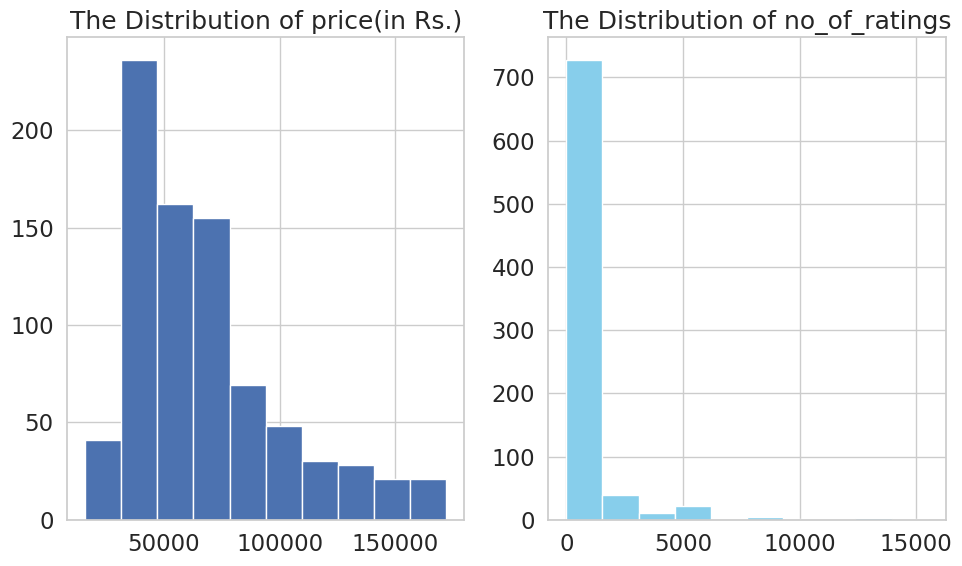

In [34]:
dist_age_balance = plt.figure(figsize = (10,6))

ra1 = dist_age_balance.add_subplot(1,2,1) 
ra2 = dist_age_balance.add_subplot(1,2,2)

ra1.hist(dataset3['price(in Rs.)'])
ra1.set_title('The Distribution of price(in Rs.)')

ra2.hist(dataset3['no_of_ratings'], color = 'skyblue')
ra2.set_title('The Distribution of no_of_ratings')

plt.tight_layout() 
plt.show()

**4. Splitting Dataset**

**4.1 Slicing**

We define x and y as x for data and y for label

Dataset ini berisi sekumpulan data yang terorganisir dalam bentuk tabel dengan baris dan kolom. Setiap baris dalam dataset mewakili entitas atau sampel data, sedangkan setiap kolom mewakili atribut atau fitur data.

In [35]:
dataset

,Unnamed: 0,img_link,name,price(in Rs.),processor,ram,storage,display(in inch),rating,no_of_ratings,no_of_reviews
0,0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,512 GB SSD,15.6,4.500000,14.00000,1.000000
1,1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,1 TB HDD|256 GB SSD,15.6,4.400000,53.00000,3.000000
2,2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,15.6,4.400000,4733.00000,463.000000
3,3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,15.6,4.300000,10406.00000,1040.000000
5,5,https://rukminim1.flixcart.com/image/312/312/k...,APPLE 2020 Macbook Air M1,86990,Apple M1 Processor,8 GB DDR4 RAM,256 GB SSD,13.3,4.700000,8865.00000,795.000000
...,...,...,...,...,...,...,...,...,...,...,...
977,977,https://rukminim1.flixcart.com/image/312/312/x...,DELL Core i5 11th Gen,67500,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,512 GB SSD,15.6,4.284884,718.09157,83.898256
979,979,https://rukminim1.flixcart.com/image/312/312/k...,ASUS VivoBook 15 Core i3 10th Gen,37990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,1 TB HDD,15.6,4.000000,1907.00000,227.000000
981,981,https://rukminim1.flixcart.com/image/312/312/x...,ASUS Ryzen 5 Hexa Core,54990,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,14.0,4.500000,22.00000,5.000000
982,982,https://rukminim1.flixcart.com/image/312/312/k...,DELL Inspiron Core i3 11th Gen,40990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,1 TB HDD|256 GB SSD,15.6,4.000000,801.00000,104.000000


Baris pertama menginisialisasi variabel x dengan dataset yang dihasilkan dari penghapusan kolom 'rating'.

Fungsi drop() digunakan pada objek dataset dengan parameter axis=1. Parameter axis=1 menunjukkan bahwa kolom yang akan dihapus. Dalam hal ini, kolom 'rating' akan dihapus.

Hasilnya, variabel x akan berisi dataset yang sama dengan dataset awal, namun kolom 'rating' telah dihapus. Dengan kata lain, x adalah dataset tanpa kolom 'rating'. Penghapusan kolom ini berguna jika ingin memisahkan atribut dari target dalam analisis atau pemodelan data.

In [36]:
x = dataset.drop('rating', axis=1)
x

,Unnamed: 0,img_link,name,price(in Rs.),processor,ram,storage,display(in inch),no_of_ratings,no_of_reviews
0,0,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo Intel Core i5 11th Gen,62990,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,512 GB SSD,15.6,14.00000,1.000000
1,1,https://rukminim1.flixcart.com/image/312/312/x...,Lenovo V15 G2 Core i3 11th Gen,37500,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,1 TB HDD|256 GB SSD,15.6,53.00000,3.000000
2,2,https://rukminim1.flixcart.com/image/312/312/l...,ASUS TUF Gaming F15 Core i5 10th Gen,49990,Intel Core i5 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,15.6,4733.00000,463.000000
3,3,https://rukminim1.flixcart.com/image/312/312/x...,ASUS VivoBook 15 (2022) Core i3 10th Gen,33990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,512 GB SSD,15.6,10406.00000,1040.000000
5,5,https://rukminim1.flixcart.com/image/312/312/k...,APPLE 2020 Macbook Air M1,86990,Apple M1 Processor,8 GB DDR4 RAM,256 GB SSD,13.3,8865.00000,795.000000
...,...,...,...,...,...,...,...,...,...,...
977,977,https://rukminim1.flixcart.com/image/312/312/x...,DELL Core i5 11th Gen,67500,Intel Core i5 Processor (11th Gen),16 GB DDR4 RAM,512 GB SSD,15.6,718.09157,83.898256
979,979,https://rukminim1.flixcart.com/image/312/312/k...,ASUS VivoBook 15 Core i3 10th Gen,37990,Intel Core i3 Processor (10th Gen),8 GB DDR4 RAM,1 TB HDD,15.6,1907.00000,227.000000
981,981,https://rukminim1.flixcart.com/image/312/312/x...,ASUS Ryzen 5 Hexa Core,54990,AMD Ryzen 5 Hexa Core Processor,8 GB DDR4 RAM,512 GB SSD,14.0,22.00000,5.000000
982,982,https://rukminim1.flixcart.com/image/312/312/k...,DELL Inspiron Core i3 11th Gen,40990,Intel Core i3 Processor (11th Gen),8 GB DDR4 RAM,1 TB HDD|256 GB SSD,15.6,801.00000,104.000000


Choose feature Type as a label

Baris pertama menginisialisasi variabel y dengan kolom "price(in Rs.)" dari dataset.

Dalam hal ini, dataset["price(in Rs.)"] digunakan untuk mengakses kolom "price(in Rs.)" dari dataset dan mengisinya ke dalam variabel 'y'. Ini memungkinkan Anda untuk memperoleh kolom tersebut sebagai objek terpisah yang dapat digunakan dalam analisis atau pemodelan data.

Dengan demikian, variabel 'y' akan berisi nilai-nilai dari kolom "price(in Rs.)" dalam dataset. Seperti memprediksi harga berdasarkan atribut lainnya atau melakukan visualisasi atau perhitungan yang spesifik terhadap kolom tersebut.

In [37]:
y = dataset["price(in Rs.)"]
y

0      62990
1      37500
2      49990
3      33990
5      86990
       ...  
977    67500
979    37990
981    54990
982    40990
983    24540
Name: price(in Rs.), Length: 811, dtype: int64

Dengan melakukan y.values.reshape(-1,1), variabel y akan berisi matriks dengan satu kolom yang berisi nilai-nilai dari variabel y sebelumnya. Perubahan bentuk ini berguna jika ingin menggunakan variabel y dalam analisis atau pemodelan yang membutuhkan matriks sebagai input.

In [38]:
y.values.reshape(-1,1)

array([[ 62990],
       [ 37500],
       [ 49990],
       [ 33990],
       [ 86990],
       [ 23990],
       [ 36890],
       [ 33999],
       [ 38990],
       [ 26990],
       [ 37990],
       [ 56990],
       [ 39990],
       [ 46990],
       [ 37990],
       [ 49123],
       [ 47990],
       [ 86500],
       [ 86990],
       [ 44990],
       [ 52990],
       [ 38990],
       [ 33890],
       [ 33990],
       [ 26990],
       [ 38500],
       [ 45909],
       [ 49990],
       [ 40950],
       [ 52890],
       [ 99990],
       [ 59990],
       [ 58018],
       [ 38699],
       [ 32990],
       [ 53990],
       [ 64990],
       [ 52990],
       [ 46990],
       [109990],
       [ 68114],
       [ 56049],
       [ 25990],
       [ 33990],
       [ 38990],
       [ 47039],
       [ 67990],
       [ 40990],
       [ 46990],
       [ 38500],
       [ 49990],
       [131990],
       [159990],
       [ 52890],
       [ 74990],
       [ 61990],
       [ 74990],
       [ 38699],
       [ 51990

**4.2 Categorical Encoding**

Choose One Hot Encoding or Label Encoding for perform categorical encoding

**One-Hot Encoding for data input x**

Dengan melakukan pd.get_dummies(x), variabel x akan berisi dataset yang telah diubah dengan dummy variables. Perubahan ini berguna dalam analisis atau pemodelan data ketika variabel kategorikal perlu direpresentasikan sebagai variabel numerik.

In [38]:
x = pd.get_dummies(x)
x

,Unnamed: 0,price(in Rs.),display(in inch),no_of_ratings,no_of_reviews,img_link_https://rukminim1.flixcart.com/image/312/312/computer/a/y/b/hp-spectre-notebook-original-imaepbx7ncxbuzwc.jpeg?q=70,img_link_https://rukminim1.flixcart.com/image/312/312/computer/k/q/r/acer-predator-notebook-original-imaejmg5gzkf8sth.jpeg?q=70,img_link_https://rukminim1.flixcart.com/image/312/312/computer/x/4/g/acer-aspire-notebook-original-imaeqcx3tpzq5cna.jpeg?q=70,img_link_https://rukminim1.flixcart.com/image/312/312/j5ws0i80/computer/g/p/d/acer-na-notebook-original-imaewhwtbtzwe7ct.jpeg?q=70,img_link_https://rukminim1.flixcart.com/image/312/312/j66s3gw0/computer/y/g/n/dell-gaming-laptop-original-imaewphfgashevp5.jpeg?q=70,...,storage_1 TB SSD,storage_128 GB SSD,storage_2 TB SSD,storage_256 GB HDD,storage_256 GB HDD|256 GB SSD,storage_256 GB SSD,storage_512 GB HDD|512 GB SSD,storage_512 GB SSD,storage_PCI-e Gen4 SSD?SHIFT?Matrix Display (Extend)?Cooler Boost 3?Thunderbolt 4?Finger Print Security?True Color 2.0?Hi-Res Audio?Nahimic 3? 4-Sided Thin bezel?MSI Center?Silky Smooth Touchpad?Military-Grade Durability,"storage_PCI-e SSD (NVMe) ready,Silver-Lining Print Keyboard,Matrix Display (Extend),Cooler Boost 5,Hi-Res Audio,Nahimic 3,144Hz Panel,Thin Bezel,RGB Gaming Keyboard,Speaker Tuning Engine,MSI Center"
0,0,62990,15.6,14.00000,1.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,1,37500,15.6,53.00000,3.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,49990,15.6,4733.00000,463.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,33990,15.6,10406.00000,1040.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
5,5,86990,13.3,8865.00000,795.000000,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
977,977,67500,15.6,718.09157,83.898256,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
979,979,37990,15.6,1907.00000,227.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
981,981,54990,14.0,22.00000,5.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
982,982,40990,15.6,801.00000,104.000000,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dapat memeriksa dimensi atau ukuran dari variabel 'x', yang berguna untuk memahami jumlah data atau observasi yang ada dan jumlah fitur atau atribut yang dimiliki oleh variabel'x'.

In [39]:
x.shape

(811, 961)

**4.2.1 Standarization**

Standardization is used on the data values that are normally distributed. Further, by applying standardization, we tend to make the mean of the dataset as 0 and the standard deviation equivalent to 1.

That is, by standardizing the values, we get the following statistics of the data distribution

mean = 0
standard deviation = 1

Thus, by this the data set becomes self explanatory and easy to analyze as the mean turns down to 0 and it happens to have an unit variance.

References: https://www.askpython.com/python/examples/standardize-data-in-python#:~:text=Ways%20to%20Standardize%20Data%20in%20Python%201%201.,load_iris%20...%202%202.%20Using%20StandardScaler%20%28%29%20function

Kode ini menggunakan StandardScaler dari library sklearn.preprocessing untuk melakukan penskalaan standar (standard scaling) pada data dalam variabel x menggunakan fit_transform(). Berikut adalah penjelasan dari setiap baris kode:

Baris pertama mengimpor StandardScaler dari library sklearn.preprocessing. StandardScaler adalah sebuah transformer yang digunakan untuk melakukan penskalaan standar pada data.

Baris kedua melakukan penskalaan standar pada data dalam variabel x menggunakan StandardScaler. fit_transform() digunakan untuk menghitung parameter penskalaan standar dari data dan secara langsung melakukan transformasi pada data tersebut. Hasil penskalaan standar disimpan dalam variabel std_scale.

Baris ketiga mengubah hasil penskalaan standar dalam bentuk array menjadi DataFrame menggunakan pd.DataFrame(). Ini akan menghasilkan DataFrame baru yang berisi data yang telah diubah skala standar.

Dengan menggunakan kodingan tersebut, variabel std_scale akan berisi data yang telah mengalami penskalaan standar. Penskalaan standar adalah proses yang mengubah setiap atribut dalam dataset menjadi memiliki rata-rata nol dan simpangan baku satu. Hal ini berguna untuk memastikan bahwa semua atribut memiliki skala yang serupa dan berguna dalam beberapa metode analisis atau pemodelan data yang membutuhkan asumsi tentang distribusi normal dan skala yang serupa.

In [40]:
from sklearn.preprocessing import StandardScaler
std_scale = StandardScaler().fit_transform(x)
std_scale = pd.DataFrame(std_scale)

std_scale

,0,1,2,3,4,5,6,7,8,9,...,951,952,953,954,955,956,957,958,959,960
0,-1.682148,-0.137211,0.325298,-0.490961,-0.475428,-0.035136,-0.035136,-0.035136,-0.035136,-0.035136,...,-0.330816,-0.070403,-0.049721,-0.035136,-0.035136,-0.398210,-0.060933,0.754099,-0.035136,-0.035136
1,-1.678653,-0.901834,0.325298,-0.466185,-0.464922,-0.035136,-0.035136,-0.035136,-0.035136,-0.035136,...,-0.330816,-0.070403,-0.049721,-0.035136,-0.035136,-0.398210,-0.060933,-1.326086,-0.035136,-0.035136
2,-1.675157,-0.527172,0.325298,2.506906,1.951637,-0.035136,-0.035136,-0.035136,-0.035136,-0.035136,...,-0.330816,-0.070403,-0.049721,-0.035136,-0.035136,-0.398210,-0.060933,0.754099,-0.035136,-0.035136
3,-1.671662,-1.007123,0.325298,6.110825,4.982842,-0.035136,-0.035136,-0.035136,-0.035136,-0.035136,...,-0.330816,-0.070403,-0.049721,-0.035136,-0.035136,-0.398210,-0.060933,0.754099,-0.035136,-0.035136
4,-1.664671,0.582716,-1.374839,5.131865,3.695762,-0.035136,-0.035136,-0.035136,-0.035136,-0.035136,...,-0.330816,-0.070403,-0.049721,-0.035136,-0.035136,2.511236,-0.060933,-1.326086,-0.035136,-0.035136
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,1.732811,-0.001925,0.325298,-0.043668,-0.039932,-0.035136,-0.035136,-0.035136,-0.035136,-0.035136,...,-0.330816,-0.070403,-0.049721,-0.035136,-0.035136,-0.398210,-0.060933,0.754099,-0.035136,-0.035136
807,1.739802,-0.887135,0.325298,0.711616,0.711837,-0.035136,-0.035136,-0.035136,-0.035136,-0.035136,...,-0.330816,-0.070403,-0.049721,-0.035136,-0.035136,-0.398210,-0.060933,-1.326086,-0.035136,-0.035136
808,1.746793,-0.377187,-0.857406,-0.485878,-0.454415,-0.035136,-0.035136,-0.035136,-0.035136,-0.035136,...,-0.330816,-0.070403,-0.049721,-0.035136,-0.035136,-0.398210,-0.060933,0.754099,-0.035136,-0.035136
809,1.750288,-0.797144,0.325298,0.009001,0.065671,-0.035136,-0.035136,-0.035136,-0.035136,-0.035136,...,-0.330816,-0.070403,-0.049721,-0.035136,-0.035136,-0.398210,-0.060933,-1.326086,-0.035136,-0.035136


**4.2.2 Normalization**

A way to normalize the input features/variables is the Min-Max scaler. By doing so, all features will be transformed into the range [0,1] meaning that the minimum and maximum value of a feature/variable is going to be 0 and 1, respectively.

The main idea behind normalization/standardization is always the same. Variables that are measured at different scales do not contribute equally to the model fitting & model learned function and might end up creating a bias. Thus, to deal with this potential problem feature-wise normalization such as MinMax Scaling is usually used prior to model fitting.

reference : https://stackoverflow.com/questions/62178888/can-someone-explain-to-me-how-minmaxscaler-works


Kode ini menggunakan MinMaxScaler dari library sklearn.preprocessing untuk melakukan penskalaan Min-Max pada data dalam variabel x menggunakan fit_transform(). Berikut adalah penjelasan dari setiap baris kode:

Baris pertama mengimpor MinMaxScaler dari library sklearn.preprocessing. MinMaxScaler adalah sebuah transformer yang digunakan untuk melakukan penskalaan Min-Max pada data.

Baris kedua melakukan penskalaan Min-Max pada data dalam variabel x menggunakan MinMaxScaler. fit_transform() digunakan untuk menghitung parameter penskalaan Min-Max dari data dan secara langsung melakukan transformasi pada data tersebut. Hasil penskalaan Min-Max disimpan dalam variabel x.

Baris ketiga mengubah hasil penskalaan Min-Max dalam bentuk array menjadi DataFrame menggunakan pd.DataFrame(). Ini akan menghasilkan DataFrame baru yang berisi data yang telah diubah skala Min-Max.

Dengan menggunakan kodingan tersebut, variabel x akan berisi data yang telah mengalami penskalaan Min-Max. Penskalaan Min-Max adalah proses yang mengubah setiap atribut dalam dataset menjadi rentang nilai antara 0 dan 1. Hal ini berguna untuk memastikan bahwa semua atribut memiliki rentang nilai yang serupa dan berguna dalam beberapa metode analisis atau pemodelan data yang membutuhkan skala yang serupa antar atribut.

In [41]:
from sklearn.preprocessing import MinMaxScaler
x = MinMaxScaler().fit_transform(x)
x = pd.DataFrame(x)

x

,0,1,2,3,4,5,6,7,8,9,...,951,952,953,954,955,956,957,958,959,960
0,0.000000,0.301282,0.170940,0.000839,0.000487,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.001017,0.137885,0.170940,0.003357,0.001461,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.002035,0.217949,0.170940,0.305468,0.225414,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.003052,0.115385,0.170940,0.671680,0.506329,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.005086,0.455128,0.072650,0.572203,0.387050,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,0.993896,0.330192,0.170940,0.046291,0.040846,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
807,0.995931,0.141026,0.170940,0.123039,0.110516,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
808,0.997965,0.250000,0.102564,0.001356,0.002434,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
809,0.998983,0.160256,0.170940,0.051643,0.050633,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


**4.3 Splitting**

Kode ini menggunakan train_test_split dari library sklearn.model_selection untuk membagi dataset menjadi subset data pelatihan dan pengujian (testing) dalam variabel x dan y. Berikut adalah penjelasan dari setiap baris kode:

Baris pertama mengimpor train_test_split dari library sklearn.model_selection. train_test_split adalah sebuah fungsi yang digunakan untuk membagi dataset menjadi subset data pelatihan dan pengujian.

Baris kedua menggunakan train_test_split untuk membagi data dalam variabel x dan y menjadi subset pelatihan dan pengujian. Parameter x dan y adalah data yang akan dibagi. Parameter train_size=0.8 menentukan proporsi data yang akan digunakan sebagai data pelatihan, dalam hal ini 80% akan digunakan sebagai data pelatihan. Parameter random_state=1 digunakan untuk mengontrol pembagian data secara acak, sehingga hasilnya dapat direproduksi. Parameter stratify=y digunakan untuk memastikan bahwa proporsi kelas pada subset pelatihan dan pengujian adalah proporsi yang sama seperti dalam variabel y.

Baris ketiga mendeklarasikan empat variabel xTrain, xTest, yTrain, dan yTest untuk menyimpan subset data pelatihan dan pengujian yang dihasilkan oleh train_test_split.

Dengan menggunakan kodingan tersebut, empat variabel xTrain, xTest, yTrain, dan yTest akan berisi subset data pelatihan dan pengujian yang telah dibagi berdasarkan proporsi yang ditentukan. Data pelatihan digunakan untuk melatih model atau melakukan analisis, sementara data pengujian digunakan untuk menguji kinerja model atau melakukan evaluasi.

In [42]:
from sklearn.datasets import make_blobs
from sklearn.model_selection import train_test_split
x,y = make_blobs(n_samples=1000)
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.33, random_state=1, stratify=y)

Kode ini menggunakan Counter dari library collections untuk menghitung distribusi kelas dalam subset data pelatihan dan pengujian. Berikut adalah penjelasan dari setiap baris kode:

Baris pertama mengimpor Counter dari library collections. Counter adalah sebuah objek yang digunakan untuk menghitung elemen-elemen yang unik dalam suatu koleksi.

Baris kedua menggunakan Counter untuk menghitung distribusi kelas dalam variabel yTrain. yTrain adalah subset data pelatihan yang merupakan target atau label dari dataset.

Baris ketiga menggunakan Counter untuk menghitung distribusi kelas dalam variabel yTest. yTest adalah subset data pengujian yang juga merupakan target atau label dari dataset.

Baris keempat mencetak hasil perhitungan distribusi kelas dalam subset data pelatihan menggunakan fungsi print(). Counter(yTrain) menghasilkan dictionary yang berisi pasangan nilai kelas dengan jumlah kemunculannya. Ini akan mencetak distribusi kelas dalam subset data pelatihan.

Baris kelima mencetak hasil perhitungan distribusi kelas dalam subset data pengujian menggunakan fungsi print(). Counter(yTest) juga menghasilkan dictionary yang berisi pasangan nilai kelas dengan jumlah kemunculannya. Ini akan mencetak distribusi kelas dalam subset data pengujian.

Dengan menggunakan kodingan tersebut, hasil distribusi kelas dalam subset data pelatihan (Train distribution) dan subset data pengujian (Test distribution) akan dicetak. Hal ini berguna untuk memeriksa apakah pembagian data pelatihan dan pengujian telah dilakukan dengan baik dan distribusi kelasnya seimbang atau tidak.

In [43]:
from collections import Counter
print("Train distribution", Counter(yTrain))
print("Test distribution", Counter(yTest))

Train distribution Counter({0: 224, 1: 223, 2: 223})
Test distribution Counter({0: 110, 1: 110, 2: 110})


This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.

For example, if variable y is a binary categorical variable with values 0 and 1 and there are 25% of zeros and 75% of ones, stratify=y will make sure that your random split has 25% of 0's and 75% of 1's.

For more: https://stackoverflow.com/questions/34842405/parameter-stratify-from-method-train-test-split-scikit-learn

Tugas praktekkan dengan dataset yg berbeda dari kaggle dan upload di github


Kode ini menggunakan LogisticRegression dari library sklearn.linear_model untuk membuat model regresi logistik dalam lingkungan Collab (Google Colaboratory). Berikut adalah penjelasan dari setiap baris kode:

Baris pertama mengimpor LogisticRegression dari library sklearn.linear_model. LogisticRegression adalah sebuah kelas yang digunakan untuk membangun model regresi logistik.

Baris kedua mendeklarasikan sebuah list kosong dengan nama models. List ini akan digunakan untuk menyimpan model-model yang akan dibuat.

Baris ketiga menggunakan metode append() untuk menambahkan sebuah tuple ke dalam list models. Tuple ini terdiri dari dua elemen: ('LR', LogisticRegression()).

'LR' adalah label atau nama untuk model regresi logistik yang akan dibuat.
LogisticRegression() adalah objek model regresi logistik yang dibuat menggunakan konstruktor LogisticRegression().
Dengan menambahkan tuple ini ke dalam list models, kita dapat menyimpan dan mengacu model regresi logistik tersebut dengan label 'LR'.

Dengan menggunakan kodingan tersebut, kita dapat membuat objek model regresi logistik menggunakan LogisticRegression() dan menyimpannya dalam list models dengan label 'LR'. Model-model ini dapat digunakan untuk latihan (training) dan pengujian (testing) di langkah-langkah selanjutnya dalam proses pembuatan dan evaluasi model.

In [44]:
from sklearn.linear_model import LogisticRegression

models = []
models.append(('LR', LogisticRegression()))

Kode ini melakukan validasi silang (cross-validation) menggunakan model-model yang telah dibuat sebelumnya. Berikut adalah penjelasan dari setiap baris kode:

Baris pertama mendeklarasikan sebuah list kosong dengan nama results_c. List ini akan digunakan untuk menyimpan hasil evaluasi performa model-model.

Baris kedua mendeklarasikan sebuah list kosong dengan nama names_c. List ini akan digunakan untuk menyimpan label atau nama dari model-model.

Baris ketiga memulai loop for yang akan melakukan iterasi pada setiap elemen dalam list models. Setiap elemen tuple yang terdiri dari name dan model akan diambil.

Baris keempat mendefinisikan cara untuk membagi data validasi menggunakan KFold dengan n_splits=10. Ini akan membagi data pelatihan (xTrain dan yTrain) menjadi 10 bagian (folds) yang berbeda untuk validasi silang.

Baris kelima menggunakan metode cross_val_score untuk melatih model dengan data pelatihan (xTrain dan yTrain) dan melakukan validasi silang menggunakan cv=kfold. Parameter scoring='accuracy' menentukan metrik evaluasi yang digunakan, dalam hal ini akurasi.

Baris keenam menyimpan hasil evaluasi performa model dalam list results_c menggunakan metode append(cv_results).

Baris ketujuh menyimpan label atau nama model dalam list names_c menggunakan metode append(name).

Baris kedelapan menghasilkan pesan (message) yang berisi nama model, rata-rata akurasi, dan standar deviasi akurasi dari hasil validasi silang. Pesan ini dicetak menggunakan fungsi print(msg).

Dengan menggunakan kodingan tersebut, kita dapat melakukan validasi silang pada model-model yang telah dibuat sebelumnya menggunakan data pelatihan (xTrain dan yTrain). Hasil evaluasi performa model akan disimpan dalam list results_c dan nama model akan disimpan dalam list names_c. Selain itu, pesan yang berisi informasi tentang rata-rata akurasi dan standar deviasi akurasi dari setiap model akan dicetak.

In [45]:
results_c = []
names_c = []

for name, model in models:
    # define how to split off validation data ('kfold' how many folds)
    kfold = KFold(n_splits=10)    
    # train the model
    cv_results = cross_val_score(model, xTrain, yTrain, cv=kfold, scoring='accuracy')    
    results_c.append(cv_results)
    names_c.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

LR: 0.988060 (0.011169)


Kode ini menggunakan model regresi logistik (LogisticRegression) yang telah dibuat sebelumnya dan melatih (fit) model tersebut menggunakan data pelatihan (xTrain dan yTrain). Berikut adalah penjelasan dari setiap baris kode:

Baris pertama mendeklarasikan objek model regresi logistik dengan nama LR menggunakan konstruktor LogisticRegression(). Model ini akan digunakan untuk melakukan prediksi berdasarkan data yang diberikan.

Baris kedua menggunakan metode fit() pada objek model LR untuk melatih model dengan data pelatihan (xTrain dan yTrain). Melatih model berarti menyesuaikan parameter-parameter model agar sesuai dengan data pelatihan yang diberikan. Dalam kasus ini, model regresi logistik akan mempelajari pola dan hubungan antara fitur-fitur dalam xTrain dengan label yang sesuai dalam yTrain.

Dengan menggunakan kodingan tersebut, model regresi logistik LR akan dilatih dengan data pelatihan (xTrain dan yTrain). Setelah melatih model, model tersebut akan siap untuk digunakan untuk melakukan prediksi pada data baru atau untuk evaluasi lebih lanjut.

In [46]:
LR = LogisticRegression()
LR.fit(xTrain, yTrain)

LogisticRegression()

Kode ini menggunakan model regresi logistik (LR) yang telah dilatih sebelumnya untuk melakukan prediksi pada data pengujian (xTest). Selanjutnya, kode mencetak akurasi prediksi dengan membandingkan hasil prediksi (predictions) dengan nilai sebenarnya (yTest). Berikut adalah penjelasan dari setiap baris kode:

Baris pertama menggunakan metode predict() pada objek model regresi logistik (LR) untuk melakukan prediksi pada data pengujian (xTest). Metode ini akan menghasilkan array dengan prediksi kelas untuk setiap contoh dalam xTest.

Baris kedua menggunakan fungsi accuracy_score() dari library sklearn.metrics untuk menghitung akurasi prediksi. Fungsi ini membandingkan prediksi (predictions) dengan nilai sebenarnya (yTest) dan menghitung persentase contoh yang diprediksi dengan benar.

Hasil akurasi prediksi dicetak menggunakan fungsi print(). Ini akan mencetak nilai akurasi pada data pengujian, yang merupakan persentase contoh yang diprediksi dengan benar oleh model regresi logistik.

Dengan menggunakan kodingan tersebut, model regresi logistik (LR) akan digunakan untuk melakukan prediksi pada data pengujian (xTest). Selanjutnya, akurasi prediksi akan dihitung dan dicetak untuk memberikan informasi tentang performa model pada data pengujian.

In [50]:
predictions = LR.predict(xTest)
print(accuracy_score(yTest, predictions))

0.990909090909091


Kodingan ini digunakan untuk menghasilkan matriks kebingungan (confusion matrix) dan memvisualisasikannya dalam bentuk plot matriks. Berikut adalah penjelasan dari setiap baris kodingan:

Baris pertama mengimpor fungsi confusion_matrix dari library sklearn.metrics. Fungsi ini akan digunakan untuk menghitung matriks kebingungan antara nilai sebenarnya (yTest) dan nilai prediksi (predictions).

Baris kedua mengimpor library pylab dengan alias pl. Library ini digunakan untuk melakukan plotting.

Baris ketiga mencetak matriks kebingungan menggunakan fungsi confusion_matrix. Fungsi ini akan menghasilkan matriks kebingungan yang berisi jumlah contoh yang diprediksi dengan benar maupun salah untuk setiap kombinasi kelas.

Baris keempat mengassign hasil matriks kebingungan ke variabel cm untuk digunakan dalam visualisasi.

Baris kelima menggunakan fungsi matshow dari library pylab untuk menampilkan plot matriks kebingungan. Plot ini akan menunjukkan distribusi jumlah contoh yang diprediksi dengan benar maupun salah untuk setiap kombinasi kelas.

Baris keenam memberikan judul pada plot matriks kebingungan menggunakan fungsi title dari library pylab.

Baris ketujuh menambahkan colorbar ke plot matriks kebingungan menggunakan fungsi colorbar dari library pylab. Colorbar akan memberikan informasi tentang nilai-nilai yang direpresentasikan dalam plot.

Baris kedelapan menampilkan plot matriks kebingungan menggunakan fungsi show dari library pylab.

Dengan menggunakan kodingan tersebut, matriks kebingungan akan dihitung dan dicetak. Selanjutnya, matriks kebingungan tersebut akan divisualisasikan dalam bentuk plot matriks yang memberikan gambaran tentang kualitas prediksi model pada setiap kombinasi kelas.

[[110   0   0]
 [  0 107   3]
 [  0   0 110]]


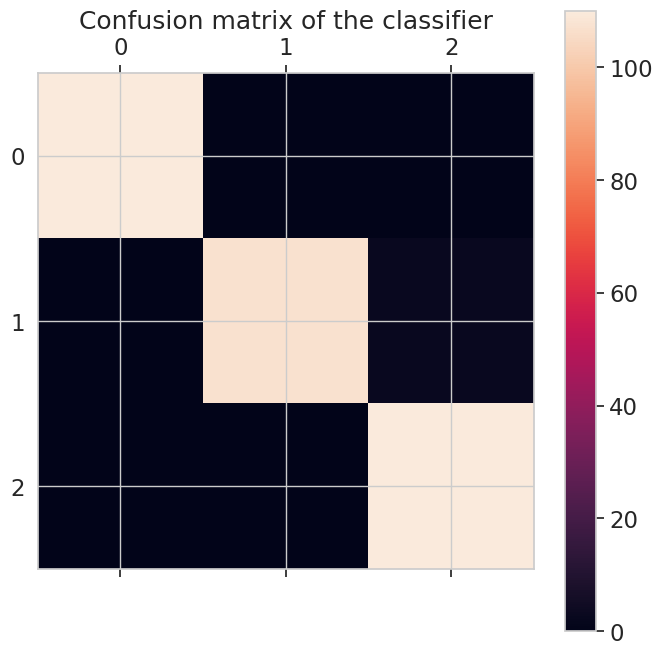

In [48]:
# Confusion Matrix 
from sklearn.metrics import confusion_matrix
import pylab as pl

print(confusion_matrix(yTest, predictions))

cm = confusion_matrix(yTest, predictions)
pl.matshow(cm)
pl.title('Confusion matrix of the classifier')
pl.colorbar()
pl.show()

Kode ini digunakan untuk menghasilkan laporan klasifikasi (classification report) yang berisi berbagai metrik evaluasi kinerja model pada data pengujian. Berikut adalah penjelasan dari setiap baris kodingan:

Baris pertama mengimpor fungsi classification_report dari library sklearn.metrics. Fungsi ini akan digunakan untuk menghasilkan laporan klasifikasi yang berisi metrik-metrik evaluasi.

Baris kedua mencetak laporan klasifikasi menggunakan fungsi classification_report. Fungsi ini akan menghasilkan laporan klasifikasi yang berisi metrik-metrik evaluasi seperti presisi, recall, f1-score, dan support untuk setiap kelas.

Dengan menggunakan kodingan tersebut, laporan klasifikasi akan dihasilkan dan dicetak. Laporan ini memberikan informasi terperinci tentang performa model dalam memprediksi setiap kelas, termasuk akurasi secara keseluruhan, presisi, recall, dan f1-score. Laporan ini sangat berguna untuk mengevaluasi performa model dan memahami kinerjanya dalam tugas klasifikasi.

In [49]:
# Classification Report
from sklearn.metrics import classification_report
print(classification_report(yTest, predictions))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       110
           1       1.00      0.97      0.99       110
           2       0.97      1.00      0.99       110

    accuracy                           0.99       330
   macro avg       0.99      0.99      0.99       330
weighted avg       0.99      0.99      0.99       330



Berikut adalah penjelasan untuk setiap metrik yang ditampilkan:

Presisi (Precision): Presisi mengukur sejauh mana model memberikan hasil yang relevan atau benar positif. Presisi untuk setiap kelas (0, 1, dan 2) adalah sebagai berikut: 1.00 untuk kelas 0, 1.00 untuk kelas 1, dan 0.97 untuk kelas 2. Presisi yang tinggi menunjukkan bahwa model memiliki kemampuan yang baik untuk mengidentifikasi contoh-contoh positif secara akurat.

Recall: Recall mengukur sejauh mana model mampu mengidentifikasi atau mengambil semua contoh positif yang relevan. Recall untuk setiap kelas (0, 1, dan 2) adalah sebagai berikut: 1.00 untuk kelas 0, 0.97 untuk kelas 1, dan 1.00 untuk kelas 2. Recall yang tinggi menunjukkan bahwa model memiliki kemampuan yang baik dalam mengambil semua contoh positif yang relevan.

F1-Score: F1-score adalah metrik yang menggabungkan presisi dan recall dengan menggunakan rata-rata harmonik. F1-score untuk setiap kelas (0, 1, dan 2) adalah sebagai berikut: 1.00 untuk kelas 0, 0.99 untuk kelas 1, dan 0.99 untuk kelas 2. F1-score yang tinggi menunjukkan bahwa model memiliki keseimbangan yang baik antara presisi dan recall.

Support: Support mencerminkan jumlah contoh dalam setiap kelas yang digunakan dalam evaluasi. Setiap kelas (0, 1, dan 2) memiliki support sebanyak 110 contoh.

Accuracy: Akurasi mengukur sejauh mana model dapat memprediksi secara benar keseluruhan kelas dalam dataset. Akurasi dinyatakan dalam persentase. Akurasi model dalam kasus ini adalah 0.99, yang berarti model memiliki tingkat keakuratan yang tinggi dalam memprediksi keseluruhan kelas dalam dataset.

Kesimpulannya, model klasifikasi yang dievaluasi memiliki performa yang sangat baik, dengan tingkat presisi, recall, dan f1-score yang tinggi untuk setiap kelas. Selain itu, akurasi model juga tinggi, menunjukkan bahwa model dapat memprediksi dengan benar sebagian besar kelas dalam dataset.